<a href="https://colab.research.google.com/github/naswadani/Tugas_Data_Mining/blob/main/CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('TOYOTA2022.csv')
# preprocess data
df = df.drop_duplicates()
df = df.replace('-', 0)
df = df.drop(columns=['No', 'BAHAN BAKAR'])
df = df.fillna(0)
df = pd.get_dummies(df, columns=['TYPE MOBIL'])
df['JENIS'] = pd.Categorical(df['JENIS'])
df['JENIS'] = df['JENIS'].cat.codes
df['TOTAL'] = df['TOTAL'] / df['TOTAL'].max()

In [5]:
# split data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['TOTAL']), df['TOTAL'], test_size=0.2)

In [6]:
# create decision tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [9]:
# generate the rules from the decision tree model
def rules(tree, feature_names):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]

    def recurse(left, right, threshold, features, node):
        if threshold[node] != -2:
            print("if ({} <= {}):".format(features[node], threshold[node]))
            if left[node] != -1:
                recurse(left, right, threshold, features, left[node])
            print("else:  # if ({} > {})".format(features[node], threshold[node]))
            if right[node] != -1:
                recurse(left, right, threshold, features, right[node])
        else:
            print("return {}".format(tree.tree_.value[node]))

    recurse(left, right, threshold, features, 0)

In [11]:
rules(model, X_train.columns)

if (OKT <= 1068.5):
if (JUN <= 208.5):
if (JUL <= 942.5):
if (NOV <= 53.5):
if (JUL <= 43.5):
if (JUN <= 22.5):
if (AGU <= 2.5):
if (TYPE MOBIL_Fortuner VRZ 2.4 DSL A/T Imp 2021 <= 0.5):
if (DES <= 40.0):
if (FEB <= 35.0):
if (JAN <= 0.5):
if (NOV <= 1.5):
if (MAR <= 1.5):
if (FEB <= 1.0):
if (DES <= 0.5):
if (JUL <= 0.5):
if (JENIS <= 4.5):
if (TYPE MOBIL_Hilux 2.4 P/U DC E <= 0.5):
return [[4.70123643e-05]]
else:  # if (TYPE MOBIL_Hilux 2.4 P/U DC E > 0.5)
return [[0.]]
else:  # if (JENIS > 4.5)
if (NOV <= 0.5):
return [[0.]]
else:  # if (NOV > 0.5)
return [[4.70123643e-05]]
else:  # if (JUL > 0.5)
if (TYPE MOBIL_New Avanza Veloz 1.5 2019 <= 0.5):
if (TYPE MOBIL_New Avanza Veloz 1.5 A/T 2019 <= 0.5):
return [[9.40247285e-05]]
else:  # if (TYPE MOBIL_New Avanza Veloz 1.5 A/T 2019 > 0.5)
return [[4.70123643e-05]]
else:  # if (TYPE MOBIL_New Avanza Veloz 1.5 2019 > 0.5)
return [[4.70123643e-05]]
else:  # if (DES > 0.5)
if (TYPE MOBIL_BZ4X EV <= 0.5):
if (APR <= 0.5):
return [[0.00023506

In [7]:
# evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

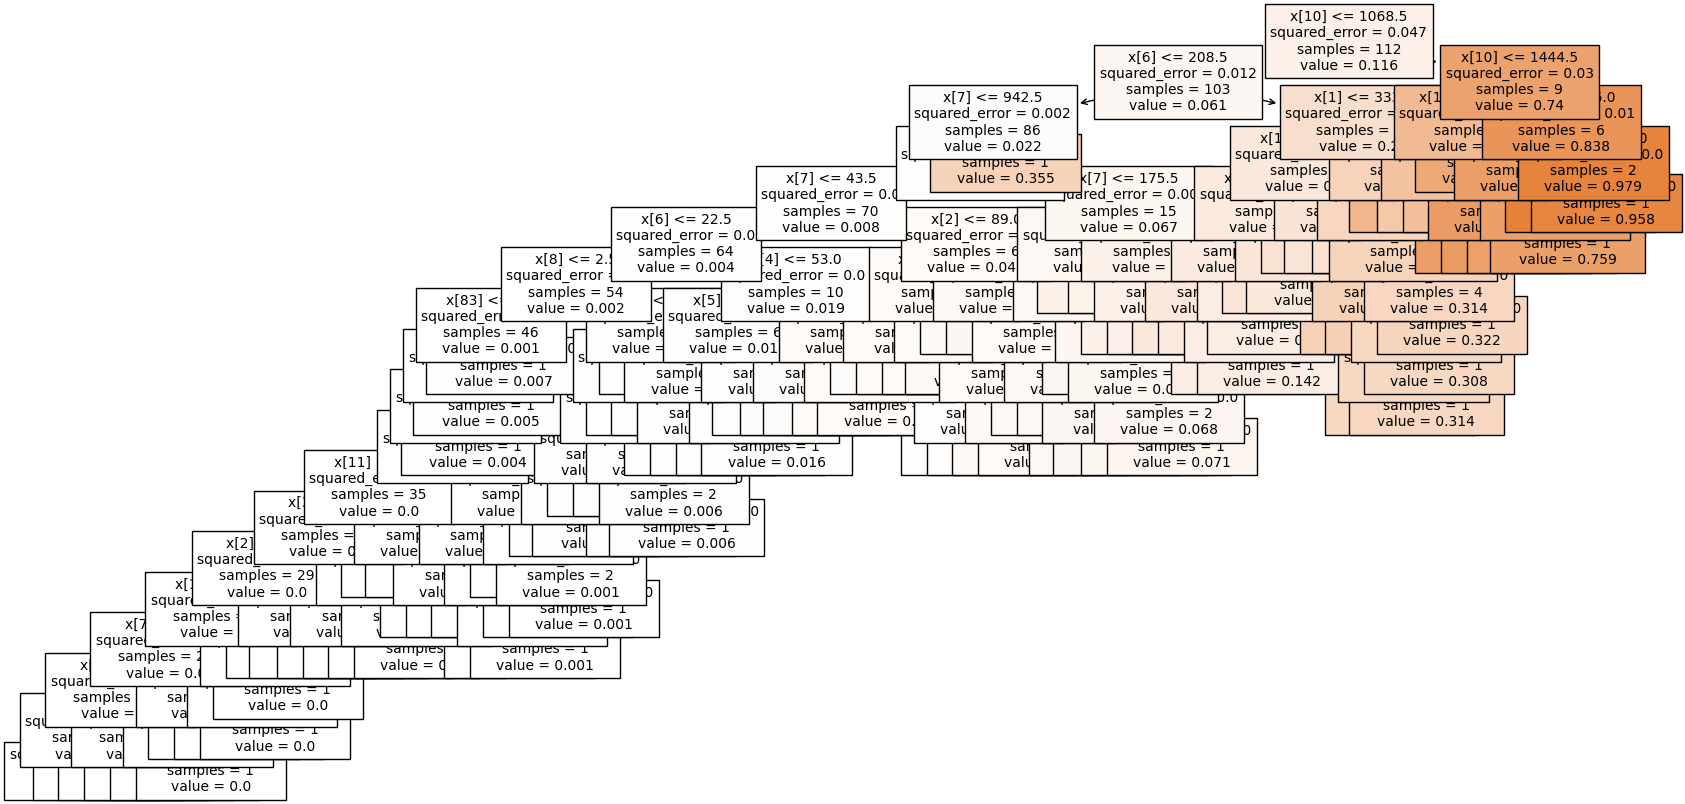

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, fontsize=10)
plt.show()